## Exploring OBD-II CAN Data

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Sequence of Events 
(File "0000286.TXT", 286_video.mov for reference):
```
Battery and Engine On (~10 second mark in video)
Logger On (unclear on *exact* timing, somewhere between battery on and first event)

    Event     time in video    time after previous event     timestamp guess
   Park           ~27s            ~10 seconds later             ~17:29:31
   Drive          ~35s            ~8  seconds later             ~17:29:39
   Park           ~39s            ~4  seconds later             ~17:29:43
   Drive          ~45s            ~6  seconds later             ~17:29:49
   Accelerate     ~50s            ~5  seconds later             ~17:29:54
   Right Turn     ~60s            ~10 seconds later             ~17:30:04
   ~20 mph
```

### Available CAN Channels

According to [This Vehicle CAN Database Reference for the Volvo S60](http://www.racelogic.co.uk/_downloads/vbox/Vehicles/Other/Docs/Volvo-S60%202010-.pdf), the available CAN channels and their units are:
```
* Accelerator Pedal Position (%)
* Brake Position (%)
* Engine Speed (rpm)
* Steering Angle (degrees)
* Wheel Speed FL (km/h)
* Wheel Speed FR (km/h)
* Wheel Speed RL (km/h)
* Wheel Speed RR (km/h)
```

In [523]:
# pull log into a dataframe
logfile = open("0000286.TXT", "r")
df = pd.read_csv(logfile, sep=' ', parse_dates=True, infer_datetime_format=True, skiprows=17, header=None, names = ["Date", "Timestamp", "Type", "ID", "Data"])
logfile.close()

In [524]:
df

,Date,Timestamp,Type,ID,Data
0,04/25,17:29:21:398,1,c0402a,1ee4000027ffd3ff
1,04/25,17:29:21:398,1,d00022,0000000000000000
2,04/25,17:29:21:398,1,11000022,01bbcc000055034a
3,04/25,17:29:21:399,1,11420006,0000000f0000c000
4,04/25,17:29:21:400,1,42406c,408a40006000c00f
5,04/25,17:29:21:400,1,1000020,00000001cc04c000
6,04/25,17:29:21:402,1,62401e,02144440fa156400
7,04/25,17:29:21:402,1,80401e,06000366002b7a00
8,04/25,17:29:21:403,1,a20016,0519840000636300
9,04/25,17:29:21:403,1,f00006,000032000000e000


### Pruning log to most important fields

In [525]:
list(df.Type.unique())

[1]

From *"CLX000_Manual_FW_5.7X.pdf"*:

**Type**:

```Message type indicator. Is either 0 (received standard), 1 (received extended), 8 (transmitted standard) or 9 (transmitted extended) in the log file```

So every row in this file has Type=1, 'received extended' - extended CAN frames are 8 bytes each

In [526]:
# So we don't need Type or Date (all same day)
del df['Date']
del df['Type']

In [527]:
# Here's what our dataframe looks like now
df.head(10)

,Timestamp,ID,Data
0,17:29:21:398,c0402a,1ee4000027ffd3ff
1,17:29:21:398,d00022,0000000000000000
2,17:29:21:398,11000022,01bbcc000055034a
3,17:29:21:399,11420006,0000000f0000c000
4,17:29:21:400,42406c,408a40006000c00f
5,17:29:21:400,1000020,00000001cc04c000
6,17:29:21:402,62401e,02144440fa156400
7,17:29:21:402,80401e,06000366002b7a00
8,17:29:21:403,a20016,0519840000636300
9,17:29:21:403,f00006,000032000000e000


### Examining IDs and Data

In [528]:
id_vals = list(df.ID.unique())
data_vals = list(df.Data.unique())

print("There are "    +str(len(df))          +" rows in this log")
print("There are "    +str(len(data_vals))   +" unique Data values in this log")
print("There are "    +str(len(id_vals))     +" unique ID values in this log")

There are 55378 rows in this log
There are 8423 unique Data values in this log
There are 27 unique ID values in this log


In [529]:
# Most common ID values
id_counter = Counter(df.ID)
id_counter.most_common(10)

[('62401e', 4078),
 ('80401e', 4078),
 ('a20016', 4078),
 ('f00006', 4078),
 ('1400006', 4078),
 ('42406c', 4077),
 ('1000020', 4077),
 ('c0402a', 4076),
 ('d00022', 4076),
 ('224024', 2910)]

In [530]:
# Most common Data values
data_counter = Counter(df.Data)
data_counter.most_common(10)

[('0000000000000000', 4862),
 ('000032000000e000', 4078),
 ('00000001cc04c000', 3277),
 ('1ee4000027ffd3ff', 2726),
 ('80000000c000c000', 1872),
 ('000160408f000000', 1405),
 ('1ee4000007ffc7ff', 1121),
 ('00000001cb04c000', 800),
 ('00a800006000c00f', 521),
 ('000005076e5dc81a', 510)]

#### Let's take the most common ID and see what happens to the data associated with this ID over time

In [490]:
df2 = df[df['ID'] == '62401e']
df2.head()

,Timestamp,ID,Data
6,17:29:21:402,62401e,02144440fa156400
21,17:29:21:412,62401e,02146440fa156400
35,17:29:21:422,62401e,02144440fa156400
44,17:29:21:432,62401e,02144440fa156400
61,17:29:21:442,62401e,02144440fa156400


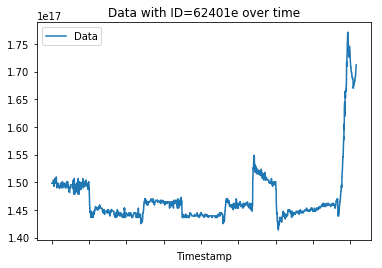

In [502]:
df2.plot(x="Timestamp", y="Data", title="Data with ID=62401e over time")

We can see the graph spikes at the end. Referring back to the sequence of live events, we know that the car was sitting still switching back from park to drive before accelerating at the end of the logged period. So this could be 'Engine Speed'.

Let's look at the other common IDs and see if a clearer picture emerges.

In [620]:
df3 = df[df['ID'] == '80401e']
df3.head()

,Timestamp,ID,Data
7,17:29:21:402,80401e,06000366002b7a00
22,17:29:21:412,80401e,1e00036a002b7a00
36,17:29:21:422,80401e,0601036a002b7a00
45,17:29:21:432,80401e,1e01036a002b7a00
62,17:29:21:442,80401e,06000367002b7a00


In [629]:
df3['IntData'] = df3.Data.apply(int, base=16)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


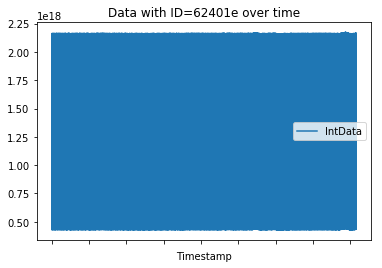

In [626]:
df3.plot(x="Timestamp", y="IntData", title="Data with ID=62401e over time")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


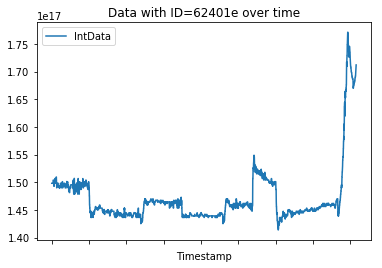

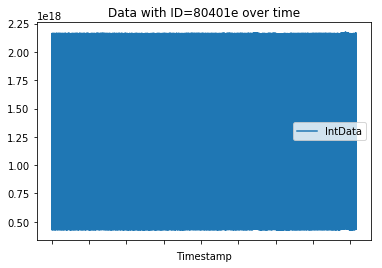

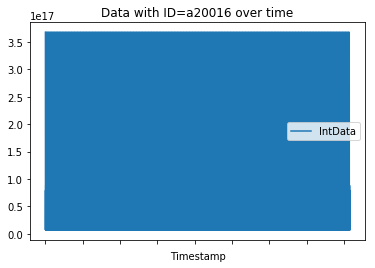

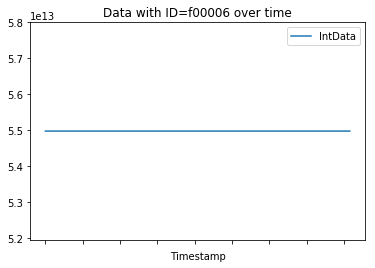

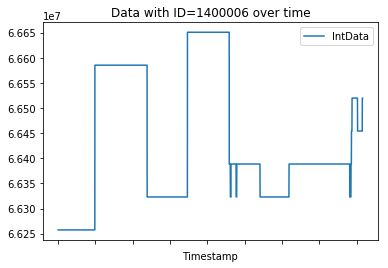

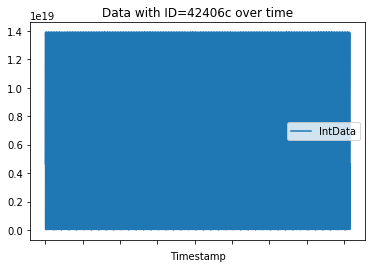

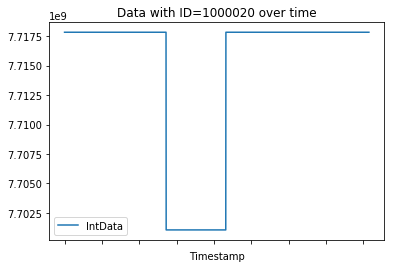

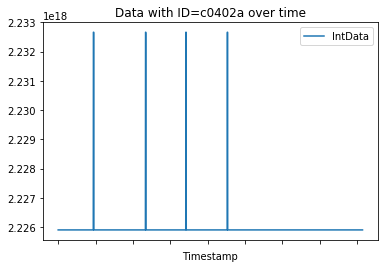

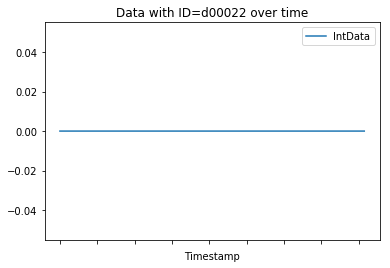

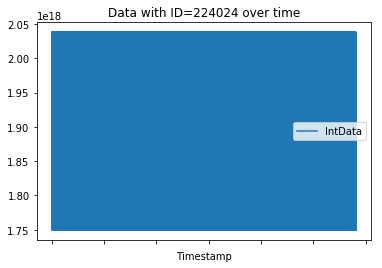

In [634]:
for id, count in id_counter.most_common(10):
    df_temp = df[df['ID']==id]
    df_temp['IntData'] = df_temp.Data.apply(int, base=16)
    df_temp.plot(x="Timestamp", y="IntData", title="Data with ID="+id +" over time")

### Further Exploration (unfinished)

In [ ]:
from collections import defaultdict

def data_to_bytes_df(data_list):
    '''converts list of extended CAN frames (8 bytes) into pandas dataframe w/ columns = bytes'''
    
    d = defaultdict(list)
    for data in data_list:
        for i in range(16,0,-2):
            d[i//2].append(data[16-i:16-i+2])

    return pd.DataFrame.from_dict(d)